<a href="https://colab.research.google.com/github/LuisAdrian13/parcial3/blob/main/Parcial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

In [115]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

In [116]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1
p2

                  _____________
                 ╱      2      
                ╱      c       
        ⅈ⋅√k⋅  ╱   - ───── + 1 
   c         ╲╱      4⋅k⋅m     
- ─── - ───────────────────────
  2⋅m              √m          

sitema subamortiguado

In [117]:
#Reemplazando los valores
mck = {m: 5.0, c: 3.0, k: 1.0}
mck

{c: 3.0, k: 1.0, m: 5.0}

In [118]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.3 + 0.33166247903554*I
p2= -0.3 - 0.33166247903554*I
xi= 0.670820393249937
omega_n= 0.447213595499958


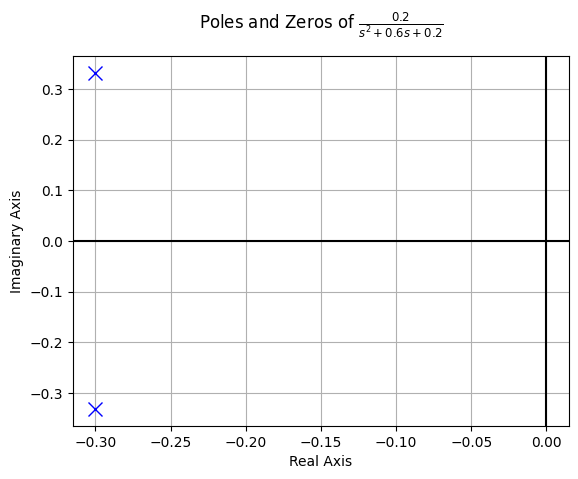

In [119]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

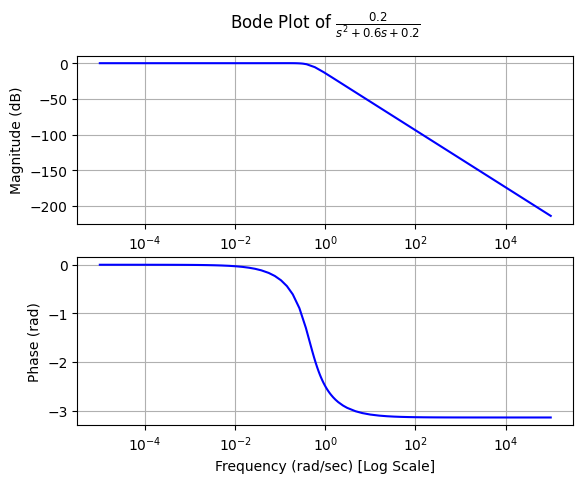

In [120]:
bode_plot(tf1)

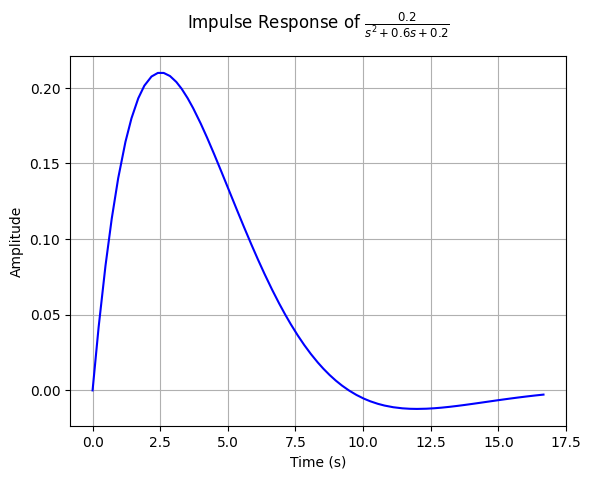

In [121]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

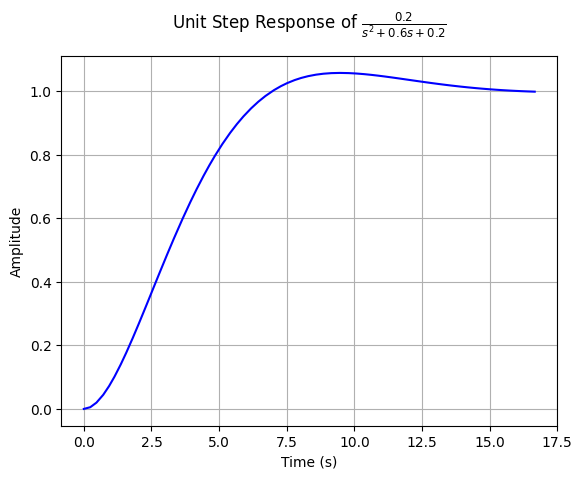

In [122]:

step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Sistema sobreamortiguado

In [123]:
#Reemplazando los valores
mck = {m: 1.0, c: 4.0, k: 1.0}
mck

{c: 4.0, k: 1.0, m: 1.0}

In [124]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -3.73205080756888
p2= -0.267949192431123
xi= 2.00000000000000
omega_n= 1.00000000000000


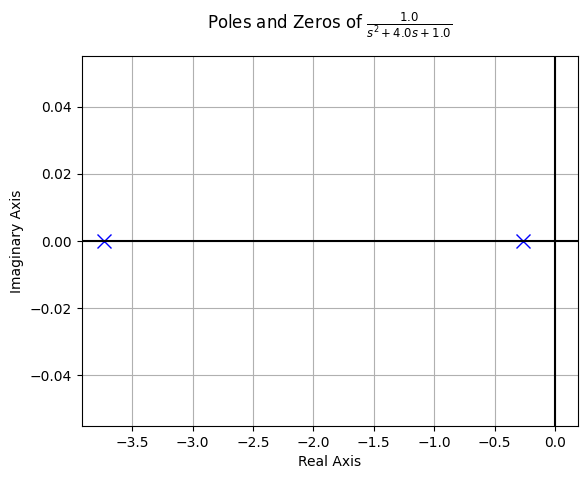

In [125]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

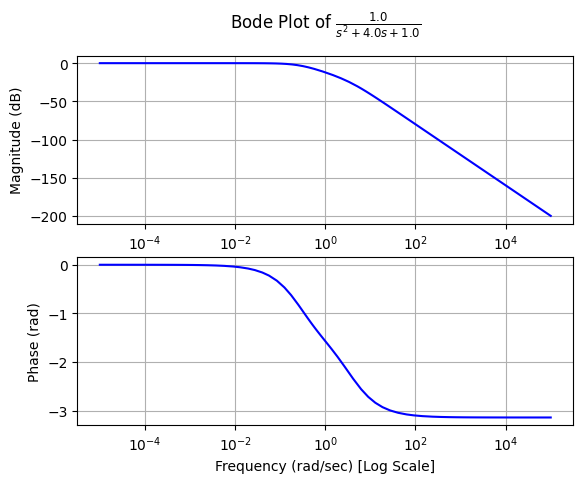

In [126]:
bode_plot(tf1)

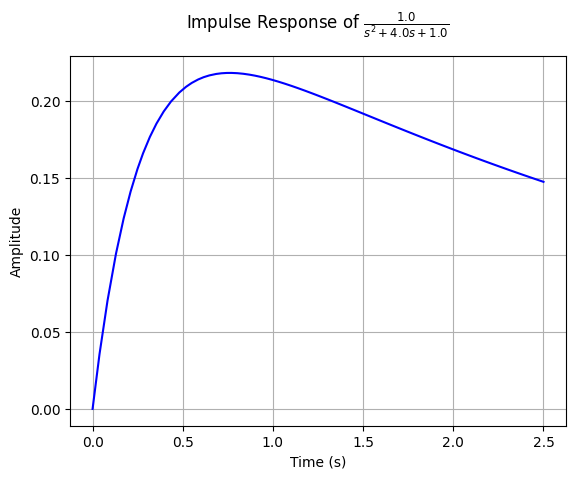

In [127]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

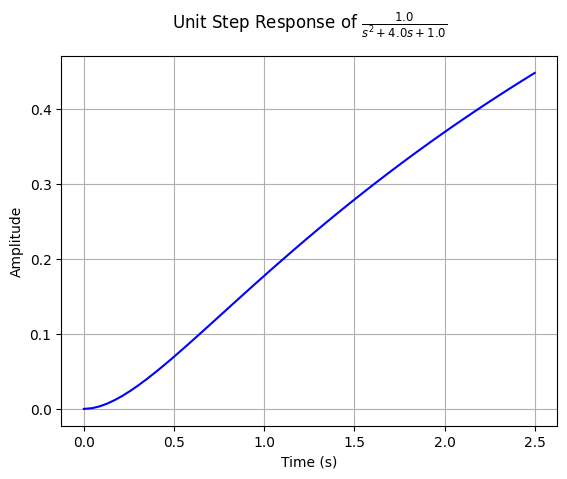

In [128]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Amortiguamiento crítico

In [129]:
#Reemplazando los valores
mck = {m: 1.0, c: 2.0, k: 1.0}
mck

{c: 2.0, k: 1.0, m: 1.0}

In [130]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.00000000000000
p2= -1.00000000000000
xi= 1.00000000000000
omega_n= 1.00000000000000


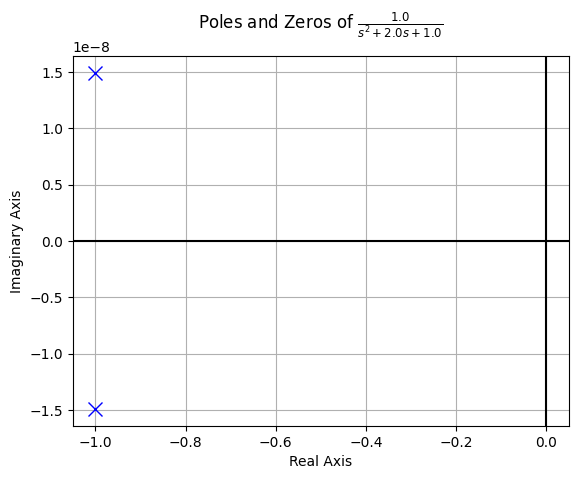

In [131]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

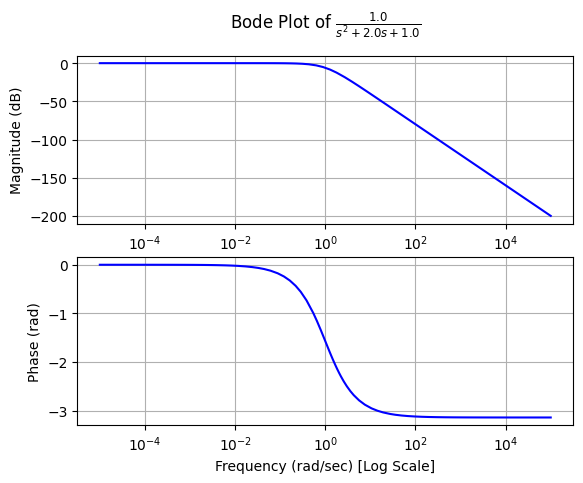

In [132]:
bode_plot(tf1)

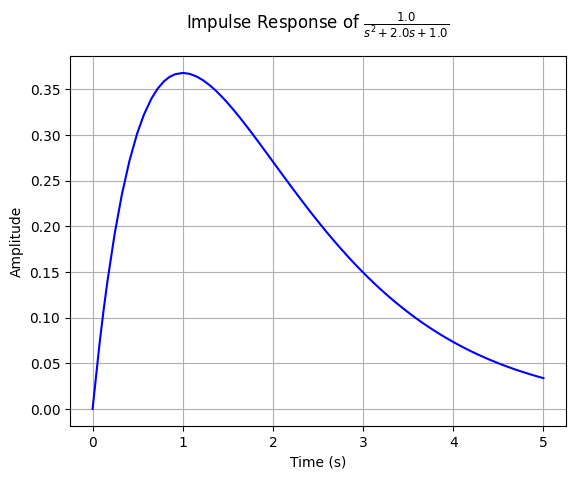

In [133]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

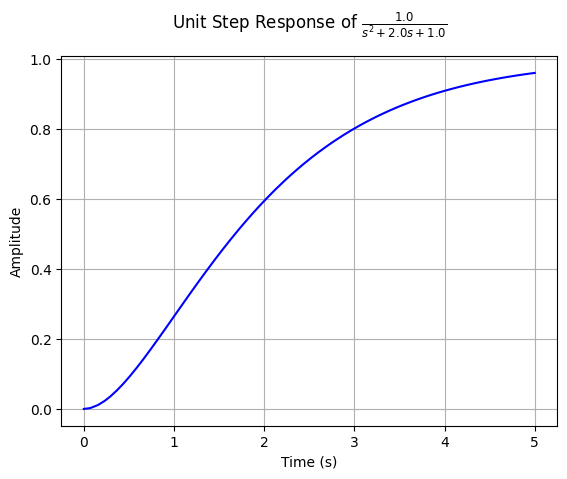

In [134]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

**LASO CERRADO**

subamortiguado

In [135]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

In [136]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k+1 # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

         1          
────────────────────
  ⎛c⋅s    2   k + 1⎞
m⋅⎜─── + s  + ─────⎟
  ⎝ m           m  ⎠

In [137]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1
p2

                         ___________________
                        ╱         2         
            _______    ╱         c          
        ⅈ⋅╲╱ k + 1 ⋅  ╱   - ─────────── + 1 
   c                ╲╱      4⋅m⋅(k + 1)     
- ─── - ────────────────────────────────────
  2⋅m                    √m                 

In [138]:
#Reemplazando los valores
mck = {m: 5.0, c: 3.0, k: 1.0}
mck

{c: 3.0, k: 1.0, m: 5.0}

In [139]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.3 + 0.556776436283002*I
p2= -0.3 - 0.556776436283002*I
xi= 0.474341649025257
omega_n= 0.632455532033676


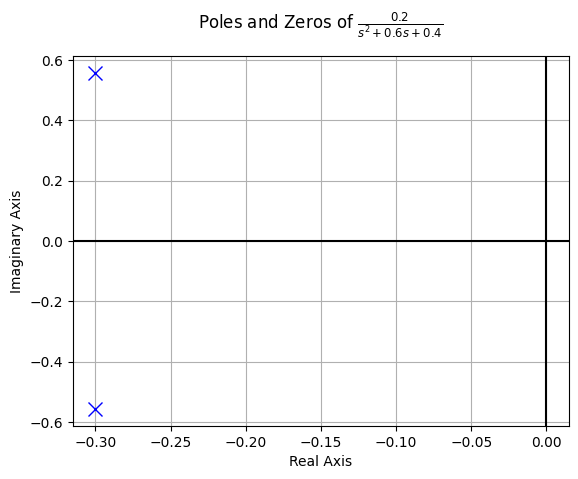

In [140]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

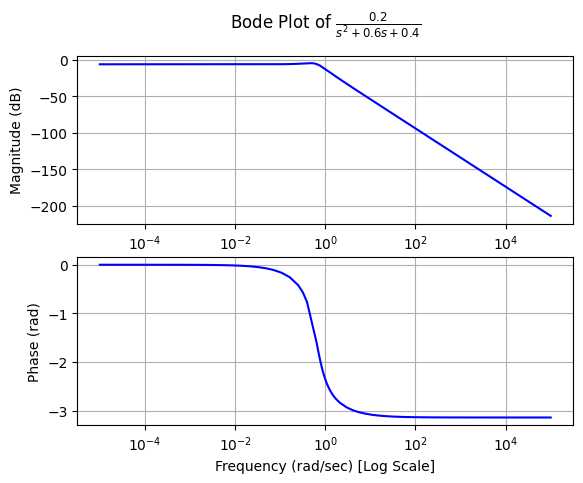

In [141]:
bode_plot(tf1)

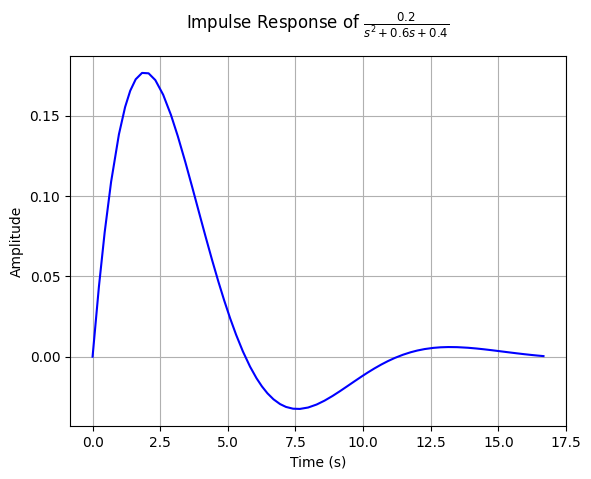

In [142]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

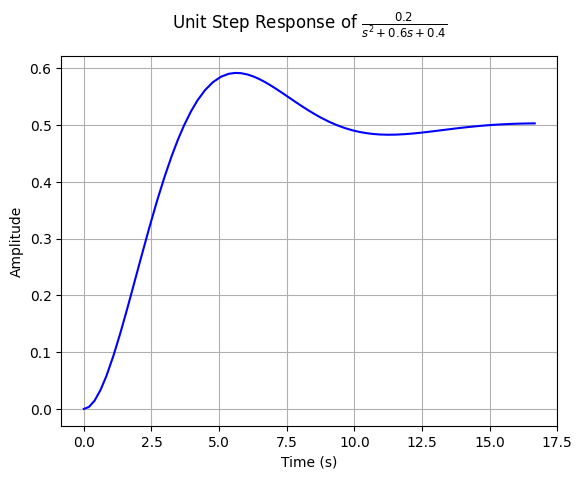

In [143]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

sobreamortiguado

In [144]:
#Reemplazando los valores
mck = {m: (1.0/2.0), c: 4.0, k: 1.0}
mck

{c: 4.0, k: 1.0, m: 0.5}

In [145]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -7.46410161513776
p2= -0.535898384862245
xi= 2.00000000000000
omega_n= 2.00000000000000


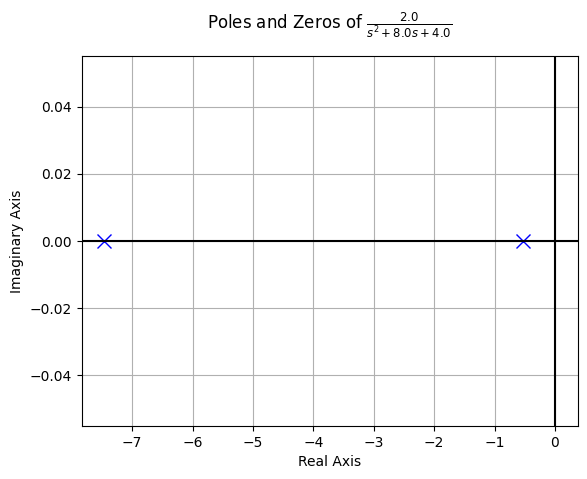

In [146]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

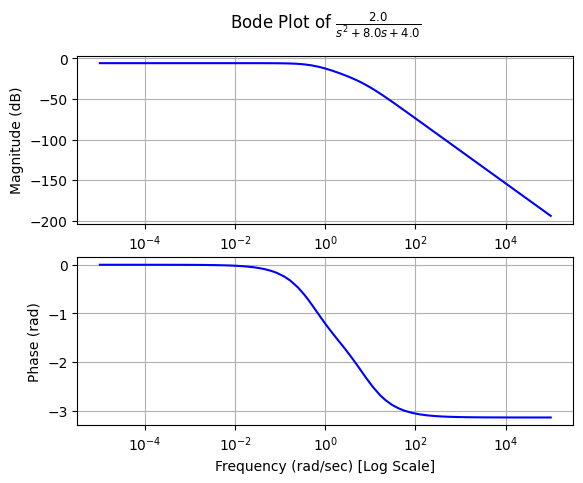

In [147]:
bode_plot(tf1)

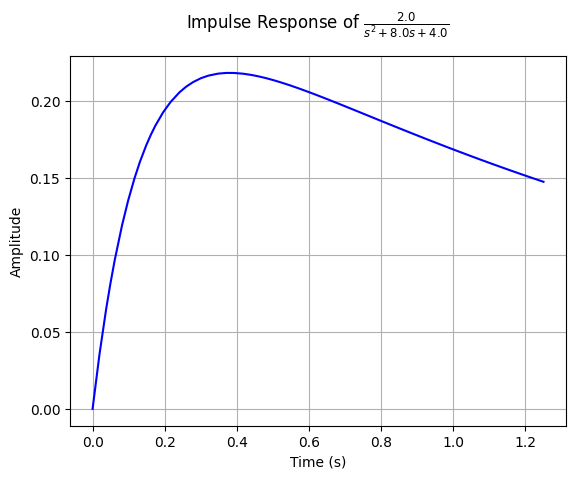

In [148]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

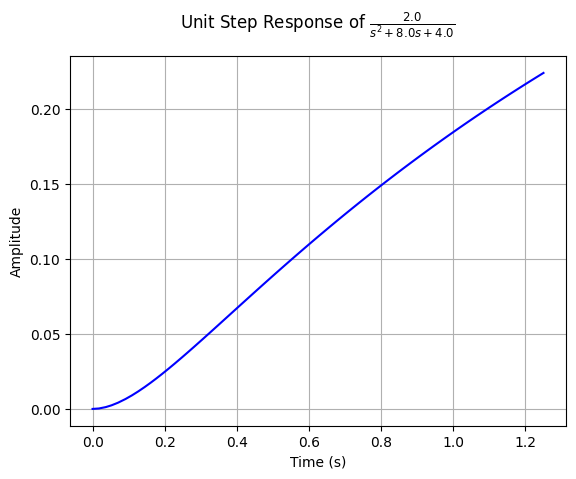

In [149]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

amortiguamiento critico

In [150]:
#Reemplazando los valores
mck = {m: 1.0, c: 2.0, k: 1.0}
mck

{c: 2.0, k: 1.0, m: 1.0}

In [151]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.0 + 1.0*I
p2= -1.0 - 1.0*I
xi= 0.707106781186548
omega_n= 1.41421356237310


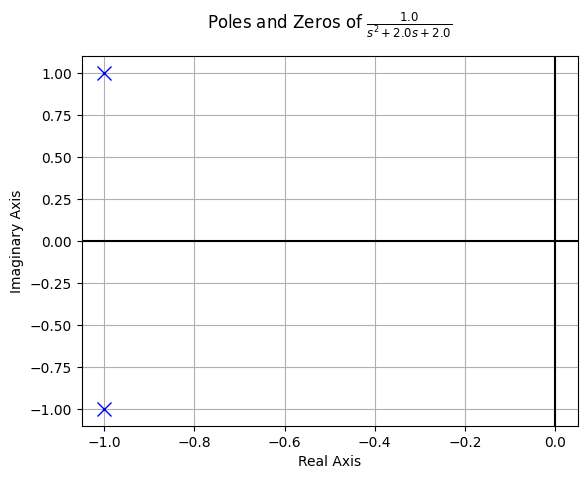

In [152]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

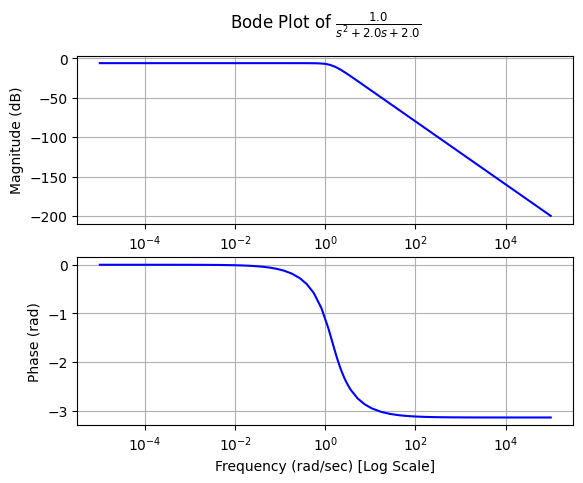

In [153]:
bode_plot(tf1)

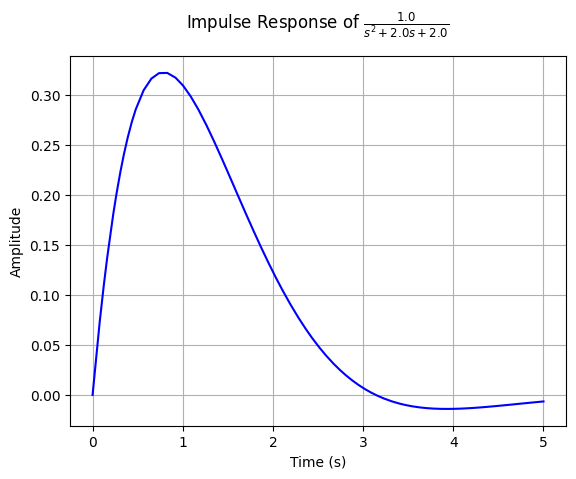

In [154]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))


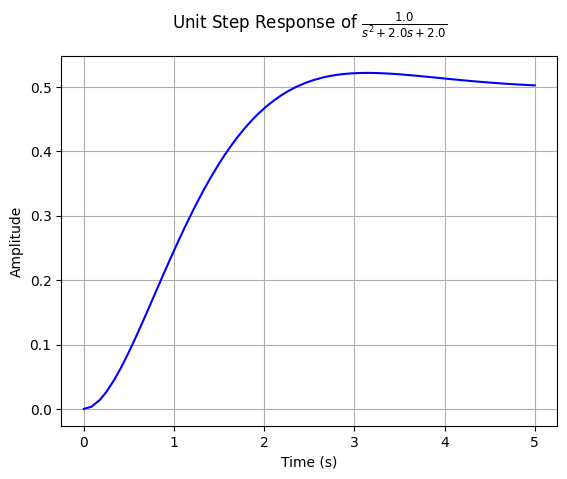

In [155]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

**SEGUNDO PUNTO**

In [156]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz


  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl (162 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.1.0-py3-none-any.whl (104 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (142 kB)
  Using cached idna-3.6-py3-none-

In [157]:
link="https://youtu.be/LGD9i718kBU?si=U0UKXL5c2B1vgxHV"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://youtu.be/LGD9i718kBU?si=U0UKXL5c2B1vgxHV
[youtube] LGD9i718kBU: Downloading webpage
[youtube] LGD9i718kBU: Downloading ios player API JSON
[youtube] LGD9i718kBU: Downloading android player API JSON
[youtube] LGD9i718kBU: Downloading m3u8 information
[info] LGD9i718kBU: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    3.41MiB in 00:00:00 at 25.64MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [158]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [159]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [160]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
import numpy as np

#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [161]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [162]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

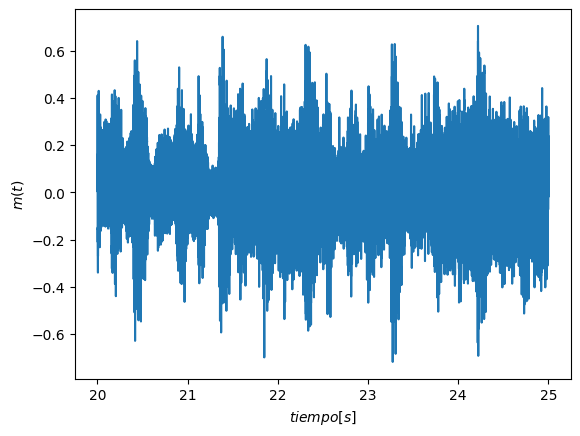

In [163]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.show()

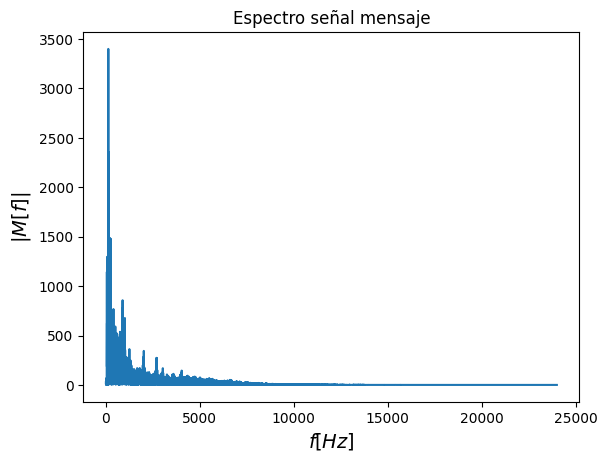

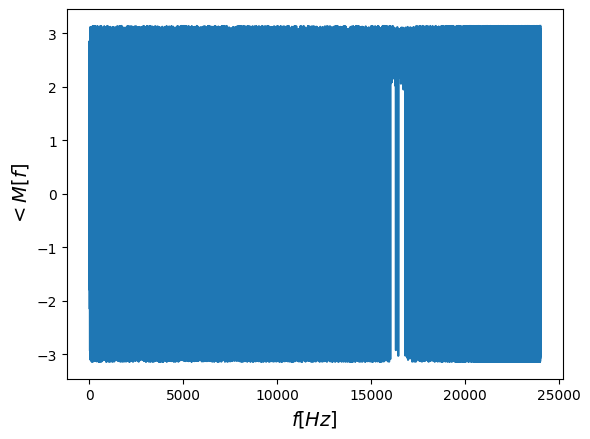

In [164]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

In [165]:
Fo = 10000 #frecuencia portadora
c = np.cos(2*np.pi*Fo*tt) #portadora

In [166]:
#repoducir portadora
Audio(c,rate=fs)

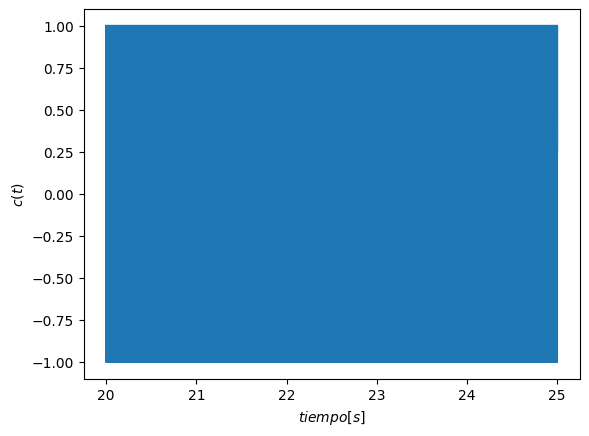

In [167]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

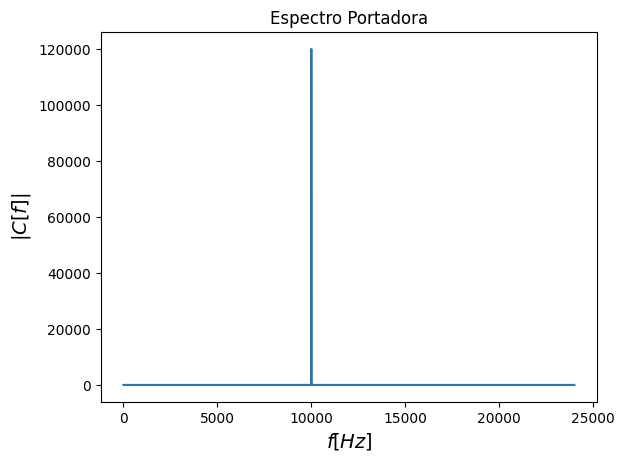

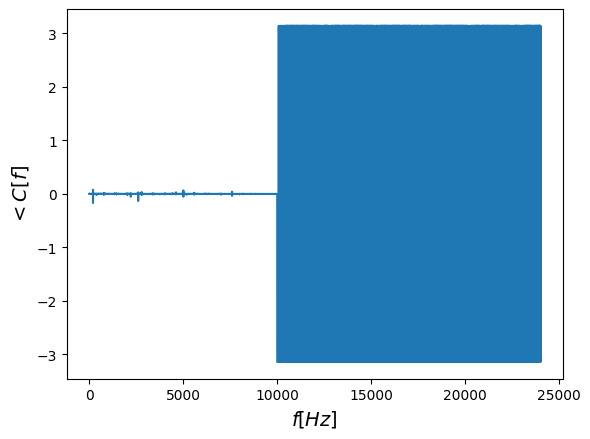

In [168]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [169]:
#señal modulada
A1 = 2
y = A1*m*c #señal modulada en AM

In [170]:
#repoducir modulada
Audio(y,rate=fs)

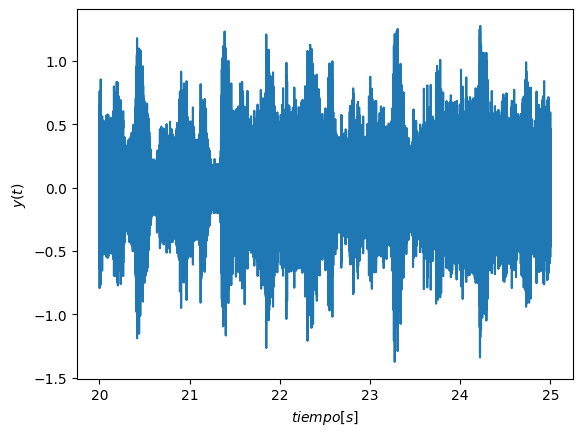

In [171]:
plt.plot(tt,y) #graficar señal modulada en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

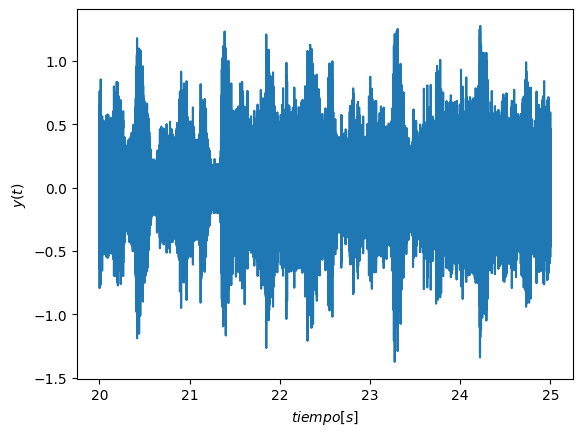

In [172]:
plt.plot(tt,y) #graficar señal modulada en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

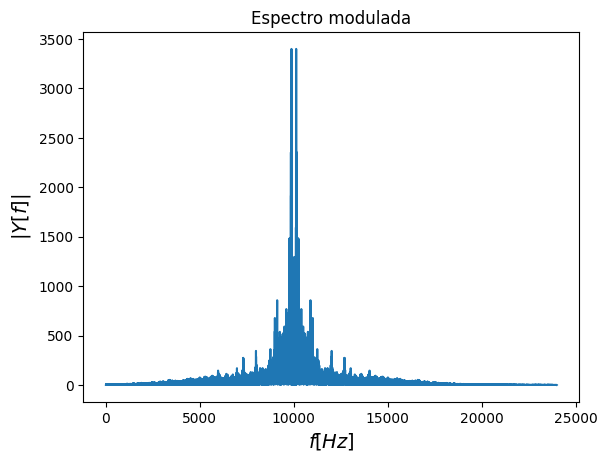

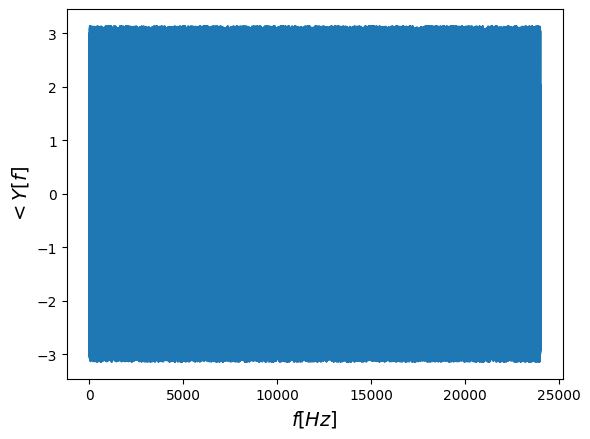

In [173]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

In [174]:
d = y*c #señal demodulada

#repoducir señal demodulada
Audio(d,rate=fs)

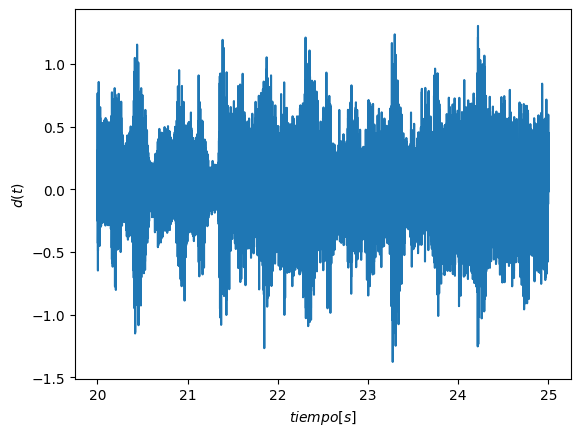

In [175]:
plt.plot(tt,d) #graficar señal demodulada en tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$d(t)$')
plt.show()

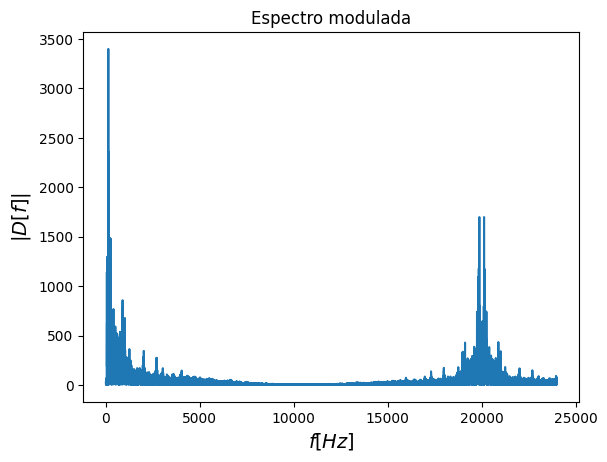

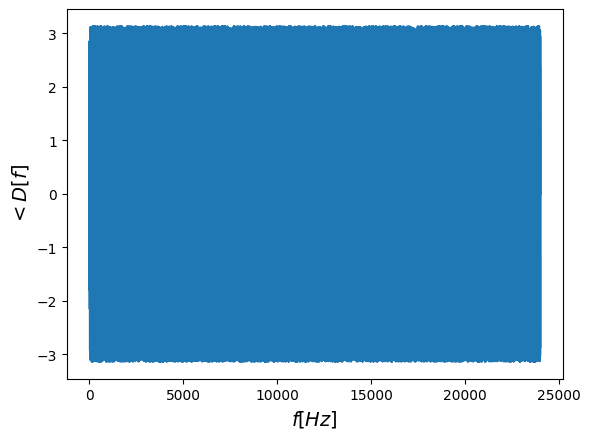

In [176]:
#Fourier señal demodulada
Dw = np.fft.rfft(d) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Dw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|D[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Dw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<D[f]$',fontsize = 14)
plt.show()

**SIMULACIÓN FILTRO PASA BAJAS**

In [177]:
from scipy.signal import butter as bw
from scipy.signal import freqz_zpk


N = 10 #orden el filtro
Wn = 10000 #banda pasante
filt = 'lowpass' #tipo del filtro (pasa-baja, pasa-alta, pasabanda, rechazabanda)
out = 'zpk' #la funcion retorna los polos y ceros junto con la ganancia. Para usar numerador y denominador usar 'ba' junto con freqz
zeros, poles, gain = bw(N, Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs) #Para indicar la longitud usar worN=K

In [178]:
from matplotlib.patches import Circle
#gráfica polos y ceros
def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()

def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
  ax = plt.gca()

  ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
  ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
  unit_circle = Circle((0,0), radius=1, fill=False,
                        color='black', ls='solid', alpha=0.9)
  ax.add_patch(unit_circle)
  ax.axvline(0, color='0.7')
  ax.axhline(0, color='0.7')

  plt.title(title)
  plt.xlabel(r'Re{$z$}')
  plt.ylabel(r'Im{$z$}')
  plt.axis('equal')
  plt.xlim((-2, 2))
  plt.ylim((-2, 2))
  plt.grid()

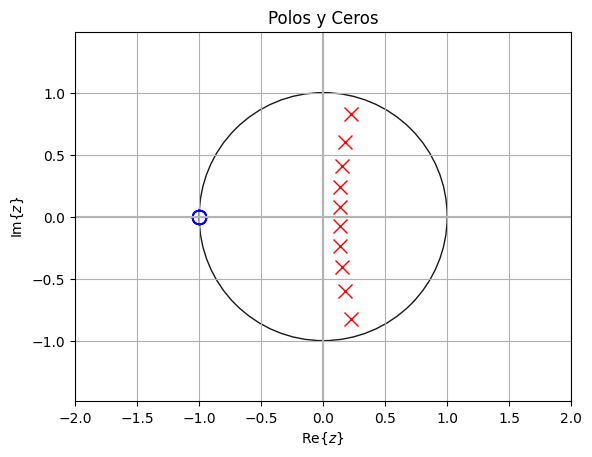

In [179]:
show_zp(zeros, poles, title='Polos y Ceros')#gráfica polos y ceros

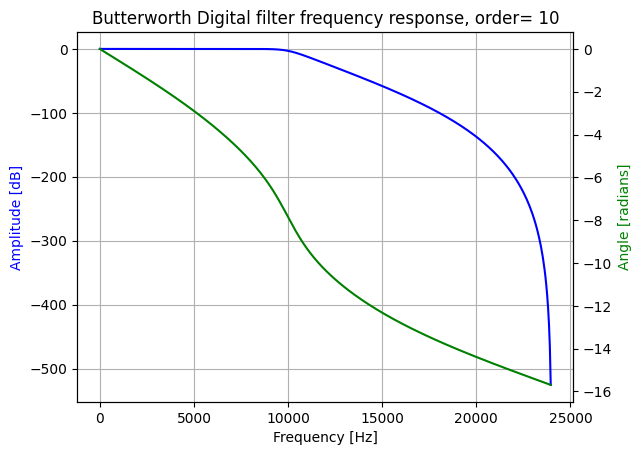

In [180]:
plot_freq_response('Butterworth', w, h, N) #gráfica de bode del filtro

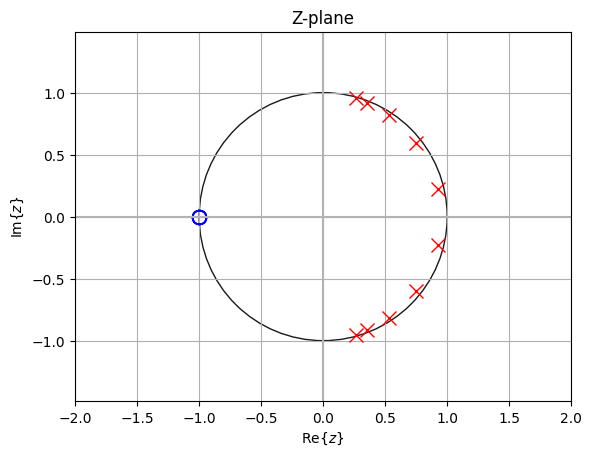

In [181]:
from scipy.signal import cheby1
N = 10
ripple = 10
zeros, poles, gain = cheby1(N, rp=ripple, Wn=Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs)

show_zp(zeros, poles)

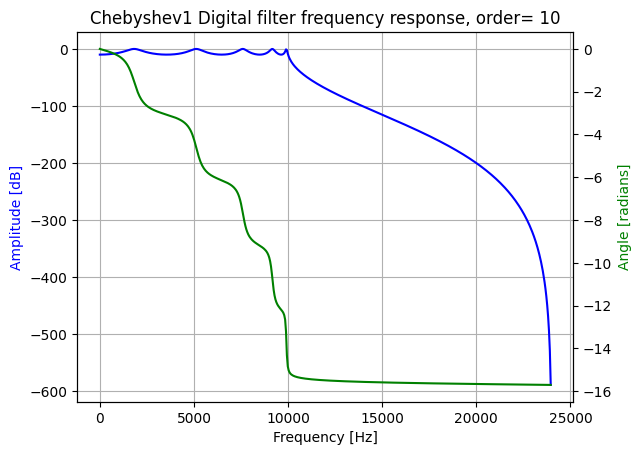

In [182]:
plot_freq_response('Chebyshev1', w, h, N)

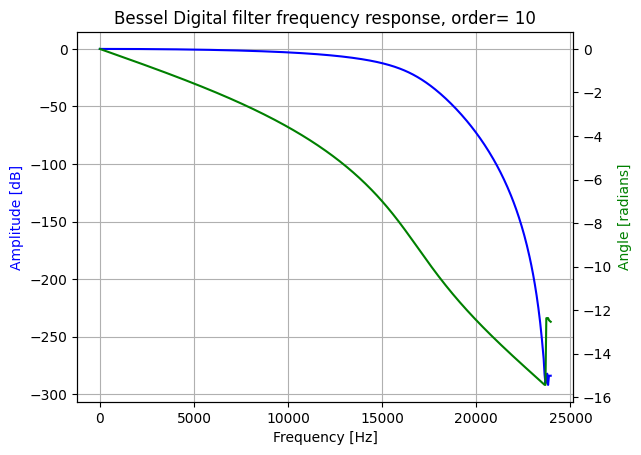

In [183]:
from scipy.signal import bessel
from scipy.signal import freqz

N = 10

normalization = 'mag' #Ajusta la frecuencia crítica según la respuesta que se desea
num, den = bessel(N, Wn=Wn, btype=filt, norm=normalization, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
w, h = freqz(num, den, fs=fs)

plot_freq_response('Bessel', w, h, N)

In [184]:
#filtrar señal
from scipy.signal import filtfilt

num,den = bw(N, Wn, btype=filt, fs=fs)

xf = filtfilt(num, den, d, axis=0)#filtro pasabajos sobre señal demodulada d
me = (2/A1)*xf #señal reescalada

In [185]:
#repoducir señal recuperada
Audio(me,rate=fs)

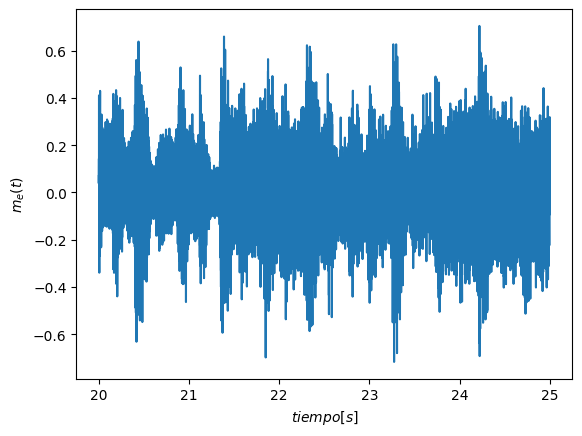

In [186]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

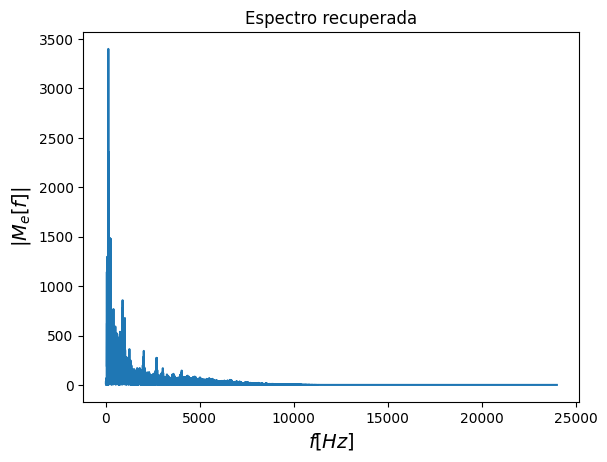

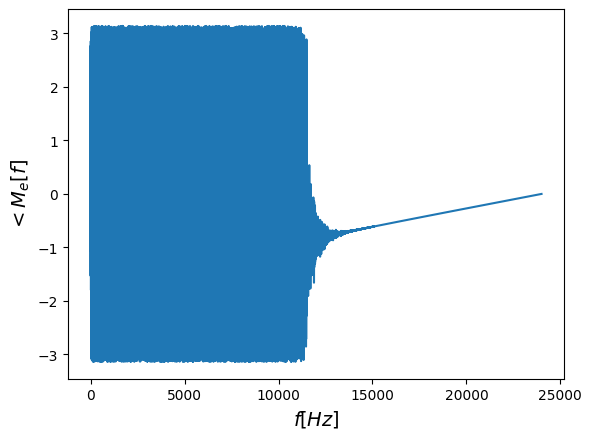

In [187]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()